In [1]:
import pandas as pd
import numpy as np

In [281]:
path = './test/v3/'

RESULT = [] 
filelist = [25, 50, 100, 200, 400, 800, 1600, 3200]
for d in filelist :     
    filename = 'test_' + str(d) + '_v3.csv'
    df = pd.read_csv(path + filename)
    df['file'] = df.iloc[:,-1].apply(lambda x : x.split(':')[0])
    col = df.groupby('file').sum().sort_values(by='cumtime', ascending = False ).iloc[:,2]
    RESULT.append(col)
df = pd.concat(RESULT, axis=1)
df.columns = filelist

In [282]:
df.sort_values(by=3200, ascending=False )[:30]

,25,50,100,200,400,800,1600,3200
validation_rule.py,14.213,16.979,22.175,34.544,55.664,101.014,193.288,428.067
data_filter.py,1.006,2.010,3.967,8.293,16.232,31.674,65.025,159.114
concat.py,0.310,0.648,1.311,2.888,6.172,15.581,39.981,129.413
validation_executor.py,8.315,9.136,10.599,14.377,20.271,34.760,62.540,125.788
case.py,6.519,7.323,8.787,12.469,18.467,32.920,60.735,123.968
test_spatialcomparison.py,6.519,7.323,8.787,12.469,18.467,32.920,60.735,123.968
datetimes.py,15.047,15.857,17.265,21.344,27.104,19.578,24.324,118.893
indexing.py,0.749,1.465,2.864,5.893,11.377,31.605,62.144,93.336
time_series_attributes_mixin.py,4.952,5.577,6.696,9.484,13.982,12.737,20.920,82.454
base.py,1.376,1.908,2.946,5.194,9.308,23.490,45.946,76.727


<AxesSubplot:>

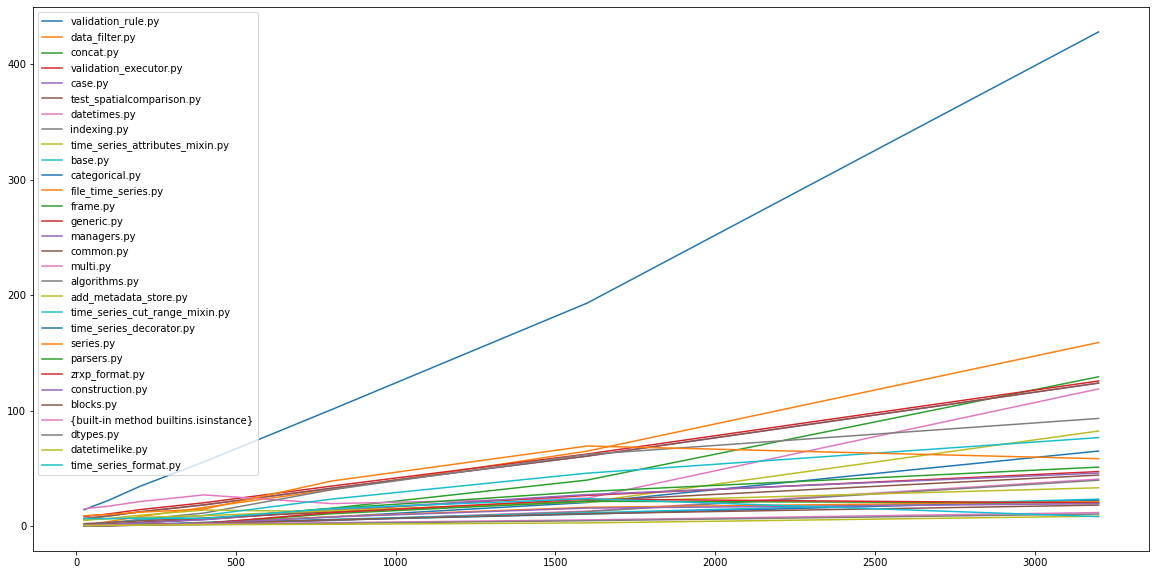

In [283]:
df.sort_values(by=3200, ascending=False )[:30].T.plot(figsize=(20,10))

In [284]:
df_top20 = df.sort_values(by=3200, ascending=False )[:20]

<AxesSubplot:>

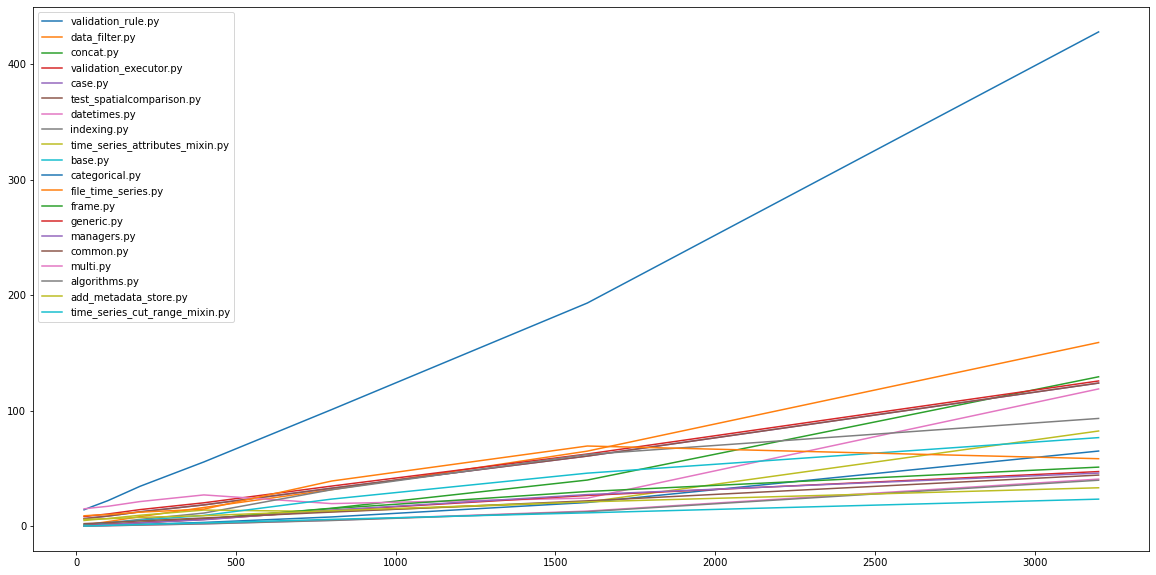

In [291]:
df_top20.T.plot(figsize=(20,10))

In [125]:
idx = df.sum(axis=1).sort_values(ascending = False).iloc[:30].index
idx2 = df.sum(axis=1).sort_values(ascending = False).iloc[:5].index

/home/park/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f41d4176a30> has a label of '__init__.py' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:>

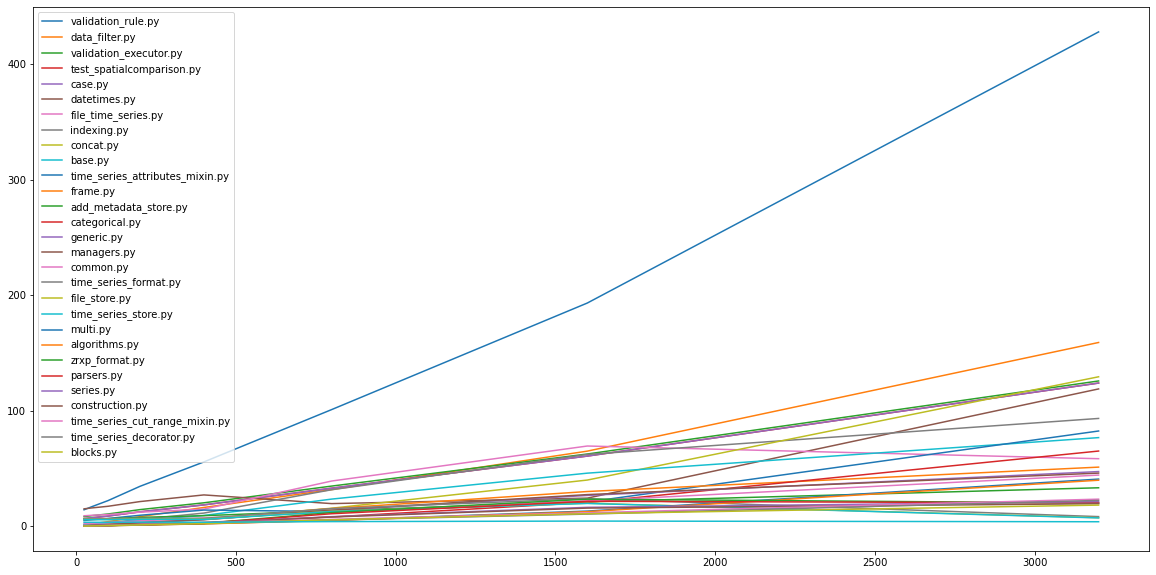

In [124]:
import matplotlib.pyplot as plt 
df.loc[idx].T.plot(figsize=(20,10))

<AxesSubplot:>

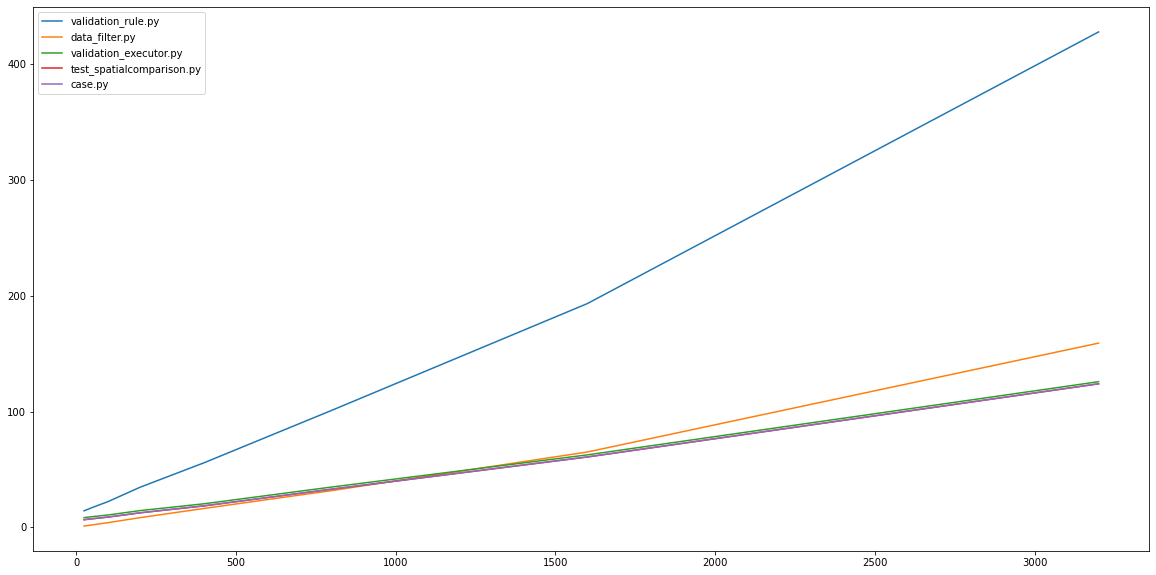

In [126]:
import matplotlib.pyplot as plt 
df.loc[idx2].T.plot(figsize=(20,10))

In [292]:
index_list = df_top20.index

In [33]:
df_filter = df[df['cumtime'] > 1]

In [52]:
df_filter[df_filter['file'] == index_list[0]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
3,1,0.037,0.037,121.469,121.469,validation_rule.py:275(validate),validation_rule.py
4,3200,0.007,0.000,96.395,0.030,validation_rule.py:708(prepare_check_kwargs),validation_rule.py
5,3200,0.052,0.000,96.388,0.030,validation_rule.py:494(prepare_check_kwargs),validation_rule.py
6,1,0.059,0.059,88.304,88.304,validation_rule.py:441(_get_ts_list_data),validation_rule.py
49,2,0.000,0.000,7.196,3.598,validation_rule.py:382(_get_ts_list),validation_rule.py
60,1,0.006,0.006,6.295,6.295,validation_rule.py:420(_get_ts_list_parameters),validation_rule.py
62,1,0.002,0.002,6.072,6.072,validation_rule.py:424(<listcomp>),validation_rule.py
122,3200,0.121,0.000,2.532,0.001,validation_rule.py:223(check),validation_rule.py
136,3200,0.023,0.000,2.320,0.001,validation_rule.py:580(_filter_neighbors),validation_rule.py
227,1,0.002,0.002,1.009,1.009,validation_rule.py:327(<listcomp>),validation_rule.py


In [53]:
df_filter[df_filter['file'] == index_list[1]]


,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
7,3200,0.073,0.0,80.442,0.025,data_filter.py:36(filter),data_filter.py
8,3200,0.299,0.0,71.674,0.022,data_filter.py:88(_filter_and_cache),data_filter.py
54,3200,0.064,0.0,6.990,0.002,data_filter.py:225(filter_quality),data_filter.py


In [54]:
df_filter[df_filter['file'] == index_list[2]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
14,3200,0.018,0.0,22.615,0.007,concat.py:82(concat),concat.py
19,3200,0.074,0.0,20.116,0.006,concat.py:306(__init__),concat.py
20,3200,0.009,0.0,19.855,0.006,concat.py:535(_get_new_axes),concat.py
21,3200,0.010,0.0,19.841,0.006,concat.py:537(<listcomp>),concat.py
23,3200,0.012,0.0,19.153,0.006,concat.py:552(_get_concat_axis),concat.py
24,3200,0.255,0.0,19.129,0.006,concat.py:609(_concat_indexes),concat.py
128,3200,0.060,0.0,2.481,0.001,concat.py:469(get_result),concat.py
143,3200,0.062,0.0,2.038,0.001,concat.py:35(concatenate_block_managers),concat.py
173,15996,0.141,0.0,1.514,0.000,concat.py:101(concat_compat),concat.py


In [55]:
df_filter[df_filter['file'] == index_list[3]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
2,1,0.001,0.001,123.968,123.968,validation_executor.py:113(validate),validation_executor.py


In [44]:
df_filter[df_filter['file'] == index_list[4]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
1,1,0.0,0.0,123.968,123.968,test_spatialcomparison.py:47(testSpatialCompar...,test_spatialcomparison.py


In [45]:
df_filter[df_filter['file'] == index_list[5]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
0,1,0.0,0.0,123.968,123.968,case.py:632(_callTestMethod),case.py


In [46]:
df_filter[df_filter['file'] == index_list[6]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
10,201200,1.214,0.0,31.887,0.0,datetimes.py:609(to_datetime),datetimes.py
13,201200,0.886,0.0,22.963,0.0,datetimes.py:267(_convert_listlike_datetimes),datetimes.py
36,201200,0.338,0.0,13.078,0.0,datetimes.py:183(_box_as_indexlike),datetimes.py
37,217200,0.464,0.0,13.052,0.0,datetimes.py:282(__new__),datetimes.py
39,217200,0.686,0.0,11.379,0.0,datetimes.py:309(_from_sequence_not_strict),datetimes.py
41,217200,1.697,0.0,9.407,0.0,datetimes.py:1891(sequence_to_dt64ns),datetimes.py
48,418400,0.935,0.0,7.325,0.0,datetimes.py:2116(maybe_convert_dtype),datetimes.py
100,198000,0.310,0.0,3.147,0.0,datetimes.py:2032(objects_to_datetime64ns),datetimes.py
185,198006,1.045,0.0,1.328,0.0,datetimes.py:484(_box_func),datetimes.py
186,6400,0.012,0.0,1.325,0.0,datetimes.py:744(_get_string_slice),datetimes.py


In [47]:
df_filter[df_filter['file'] == index_list[7]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
26,12810,0.069,0.0,16.812,0.001,indexing.py:683(__setitem__),indexing.py
42,12820/12810,0.088,0.0,8.396,0.001,indexing.py:1528(_setitem_with_indexer),indexing.py
43,12810,0.078,0.0,8.307,0.001,indexing.py:611(_get_setitem_indexer),indexing.py
44,12810,0.149,0.0,8.246,0.001,indexing.py:1639(_setitem_with_indexer_split_p...,indexing.py
46,22410,0.171,0.0,7.922,0.000,indexing.py:1789(_setitem_single_column),indexing.py
59,22401,0.065,0.0,6.352,0.000,indexing.py:882(__getitem__),indexing.py
71,12810,0.053,0.0,4.866,0.000,indexing.py:740(_convert_tuple),indexing.py
72,25620,0.131,0.0,4.799,0.000,indexing.py:1147(_convert_to_indexer),indexing.py
75,12802,0.070,0.0,4.621,0.000,indexing.py:1222(_get_listlike_indexer),indexing.py
76,19201,0.086,0.0,4.538,0.000,indexing.py:1092(_getitem_axis),indexing.py


In [49]:
df_filter[df_filter['file'] == index_list[8]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
9,95800/79800,0.340,0.0,31.919,0.0,time_series_attributes_mixin.py:58(metadata),time_series_attributes_mixin.py
12,721798/206612,0.312,0.0,25.148,0.0,time_series_attributes_mixin.py:36(_safe_meta),time_series_attributes_mixin.py
16,63998,0.068,0.0,22.109,0.0,time_series_attributes_mixin.py:54(path),time_series_attributes_mixin.py
213,95800/92600,0.032,0.0,1.085,0.0,time_series_attributes_mixin.py:46(id),time_series_attributes_mixin.py
215,95800/92600,0.028,0.0,1.080,0.0,time_series_attributes_mixin.py:50(short_name),time_series_attributes_mixin.py
216,95800/92600,0.028,0.0,1.077,0.0,time_series_attributes_mixin.py:42(name),time_series_attributes_mixin.py


In [50]:
df_filter[df_filter['file'] == index_list[9]]

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
34,208183/99271,2.281,0.0,13.651,0.000,base.py:250(__new__),base.py
58,313731,0.189,0.0,6.400,0.000,base.py:5836(ensure_index),base.py
61,2942410,1.379,0.0,6.186,0.000,base.py:254(is_dtype),base.py
84,44804,0.214,0.0,3.938,0.000,base.py:3142(get_indexer),base.py
88,6401,0.028,0.0,3.570,0.001,base.py:5796(ensure_index_from_sequences),base.py
93,19202,0.033,0.0,3.278,0.000,base.py:4946(get_indexer_for),base.py
104,6399,0.025,0.0,2.940,0.000,base.py:4330(append),base.py
107,6399,0.023,0.0,2.901,0.000,base.py:4358(_concat),base.py
115,25602,0.089,0.0,2.639,0.000,base.py:3478(reindex),base.py
117,12799,0.049,0.0,2.605,0.000,base.py:2644(union),base.py


# w Validation_rule, data_filter, acc. to be analyzed

In [129]:
idx3 = idx2[:2]

In [130]:
idx3

Index(['validation_rule.py', 'data_filter.py'], dtype='object')

In [303]:
df_top20

,25,50,100,200,400,800,1600,3200
validation_rule.py,14.213,16.979,22.175,34.544,55.664,101.014,193.288,428.067
data_filter.py,1.006,2.010,3.967,8.293,16.232,31.674,65.025,159.114
concat.py,0.310,0.648,1.311,2.888,6.172,15.581,39.981,129.413
validation_executor.py,8.315,9.136,10.599,14.377,20.271,34.760,62.540,125.788
case.py,6.519,7.323,8.787,12.469,18.467,32.920,60.735,123.968
test_spatialcomparison.py,6.519,7.323,8.787,12.469,18.467,32.920,60.735,123.968
datetimes.py,15.047,15.857,17.265,21.344,27.104,19.578,24.324,118.893
indexing.py,0.749,1.465,2.864,5.893,11.377,31.605,62.144,93.336
time_series_attributes_mixin.py,4.952,5.577,6.696,9.484,13.982,12.737,20.920,82.454
base.py,1.376,1.908,2.946,5.194,9.308,23.490,45.946,76.727


In [337]:
path = './test/v3/'
FINAL = []
for idx in index_list :
    RESULT = [] 
    filelist = [25, 50, 100, 200, 400, 800, 1600, 3200]
    for d in filelist :     
        filename = 'test_' + str(d) + '_v3.csv'
        df = pd.read_csv(path + filename)
        df['file'] = df.iloc[:,-1].apply(lambda x : x.split(':')[0])
        df = df[df['file'] == idx]
        df['function'] = df.loc[:,"filename:lineno(function)"].apply(lambda x : x.split("(")[-1][:-1])
        df_group = df.groupby('function').sum()['cumtime']
        RESULT.append(df_group)
    df = pd.concat(RESULT, axis=1)
    df.columns = filelist
    df = df.sort_values(by=3200,ascending=False)
    FINAL.append(df)


In [347]:
index_list

Index(['validation_rule.py', 'data_filter.py', 'concat.py',
       'validation_executor.py', 'case.py', 'test_spatialcomparison.py',
       'datetimes.py', 'indexing.py', 'time_series_attributes_mixin.py',
       'base.py', 'categorical.py', 'file_time_series.py', 'frame.py',
       'generic.py', 'managers.py', 'common.py', 'multi.py', 'algorithms.py',
       'add_metadata_store.py', 'time_series_cut_range_mixin.py'],
      dtype='object')

In [346]:
FINAL[0]

,25,50,100,200,400,800,1600,3200
function,,,,,,,,
prepare_check_kwargs,1.262,2.514,4.962,10.357,20.205,36.967,75.400,192.783
validate,6.499,7.283,8.711,12.313,18.166,32.302,59.539,121.469
_get_ts_list_data,0.567,1.134,2.236,4.675,9.119,17.469,35.697,88.304
_get_ts_list,5.712,5.734,5.679,6.003,5.898,12.746,19.727,7.196
<listcomp>,0.055,0.111,0.218,0.453,0.880,0.134,0.256,7.081
_get_ts_list_parameters,0.066,0.115,0.209,0.424,0.792,0.178,0.329,6.295
check,0.022,0.041,0.078,0.163,0.313,0.632,1.216,2.532
_filter_neighbors,0.018,0.035,0.069,0.139,0.271,0.556,1.075,2.320
convert_param,0.001,0.001,0.002,0.005,0.009,0.018,0.035,0.070


['preparecheckkwargs',
 'validate',
 'gettslistdata',
 'gettslist',
 '<listcomp>',
 'gettslistparameters',
 'check',
 'filterneighbors',
 'convertparam',
 'init',
 'iscorrector',
 'tsmap',
 '<setcomp>',
 'useneighbors',
 'usecomments',
 '<dictcomp>',
 'reportincidents',
 'propagate',
 'ismultitarget',
 'writecomments']

In [366]:
FINAL[0].set_index([lgd])

,25,50,100,200,400,800,1600,3200
preparecheckkwargs,1.262,2.514,4.962,10.357,20.205,36.967,75.400,192.783
validate,6.499,7.283,8.711,12.313,18.166,32.302,59.539,121.469
gettslistdata,0.567,1.134,2.236,4.675,9.119,17.469,35.697,88.304
gettslist,5.712,5.734,5.679,6.003,5.898,12.746,19.727,7.196
<listcomp>,0.055,0.111,0.218,0.453,0.880,0.134,0.256,7.081
gettslistparameters,0.066,0.115,0.209,0.424,0.792,0.178,0.329,6.295
check,0.022,0.041,0.078,0.163,0.313,0.632,1.216,2.532
filterneighbors,0.018,0.035,0.069,0.139,0.271,0.556,1.075,2.320
convertparam,0.001,0.001,0.002,0.005,0.009,0.018,0.035,0.070
init,0.011,0.011,0.011,0.012,0.011,0.012,0.011,0.012


In [363]:
FINAL[0].set_index(lgd)

KeyError: "None of ['preparecheckkwargs', 'validate', 'gettslistdata', 'gettslist', '<listcomp>', 'gettslistparameters', 'check', 'filterneighbors', 'convertparam', 'init', 'iscorrector', 'tsmap', '<setcomp>', 'useneighbors', 'usecomments', '<dictcomp>', 'reportincidents', 'propagate', 'ismultitarget', 'writecomments'] are in the columns"

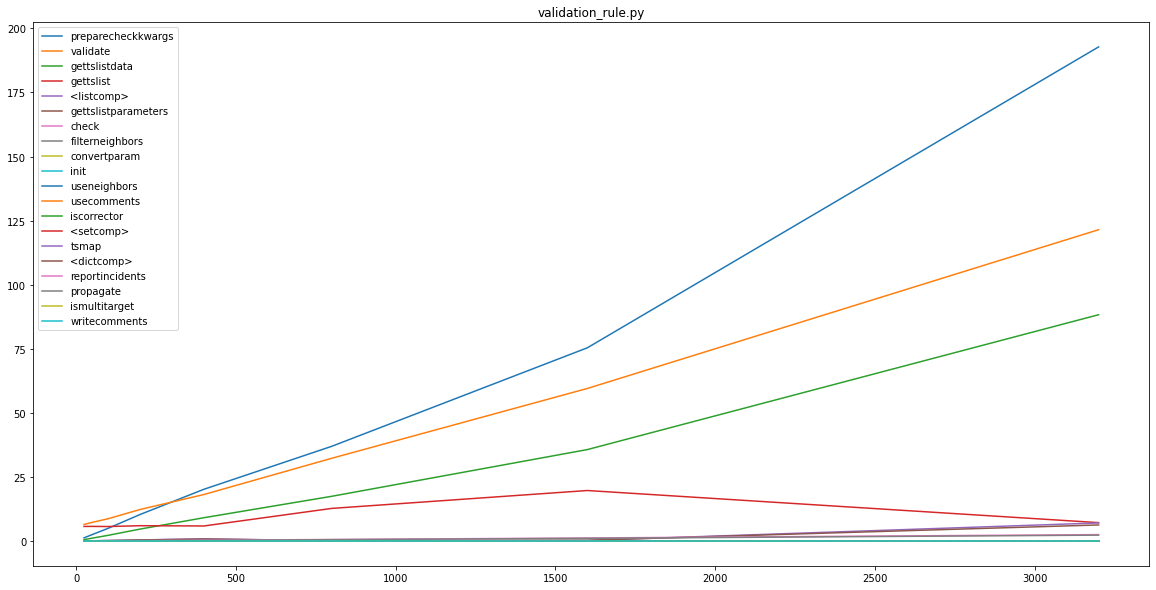

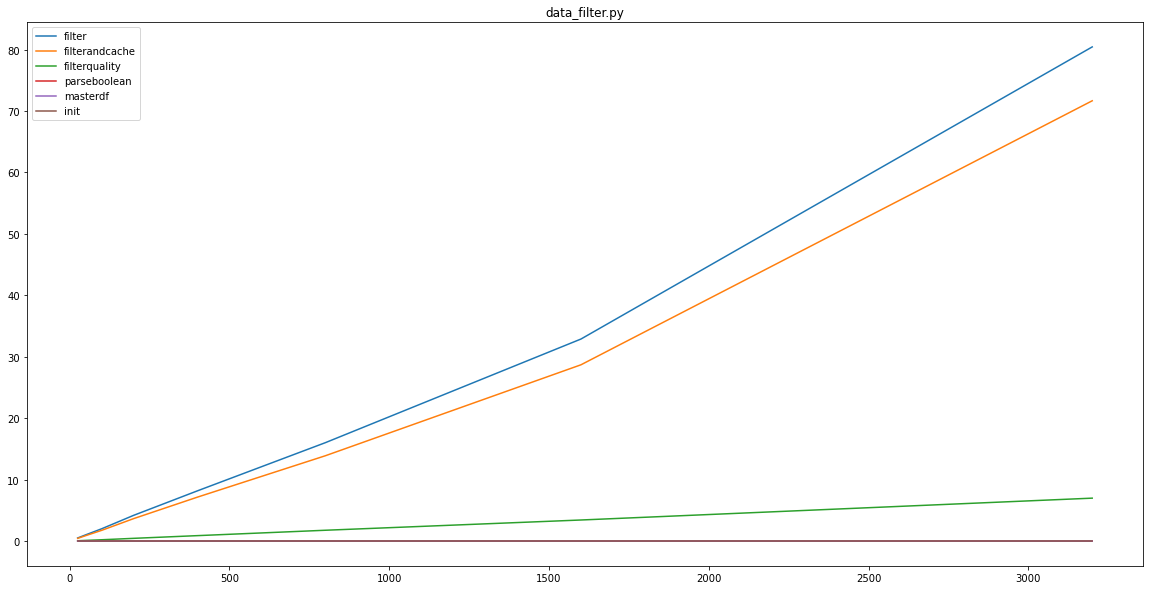

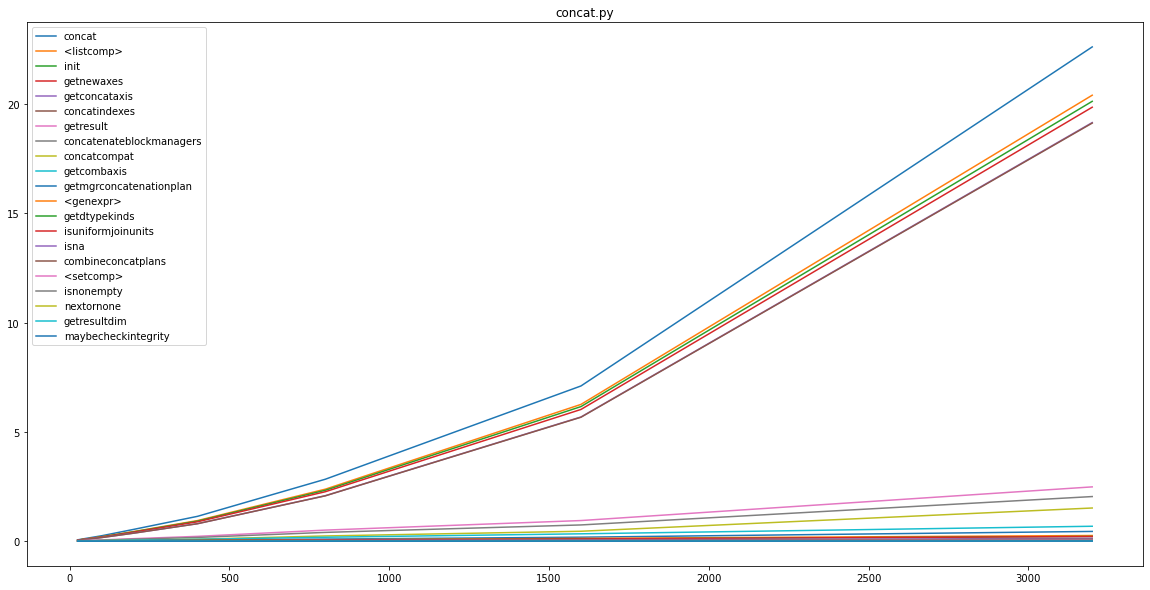

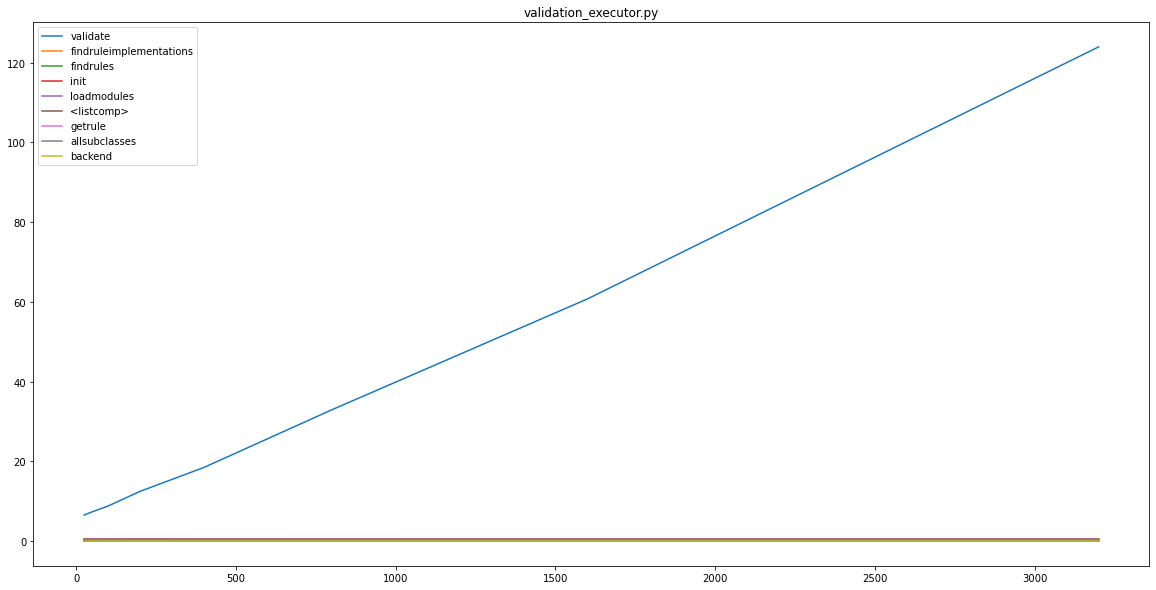

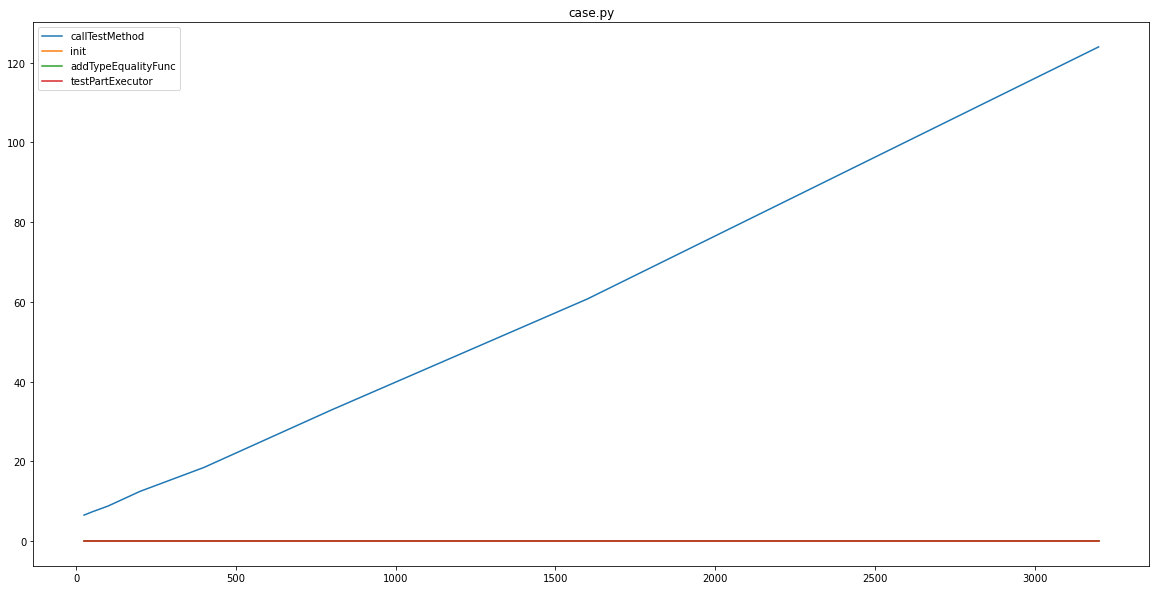

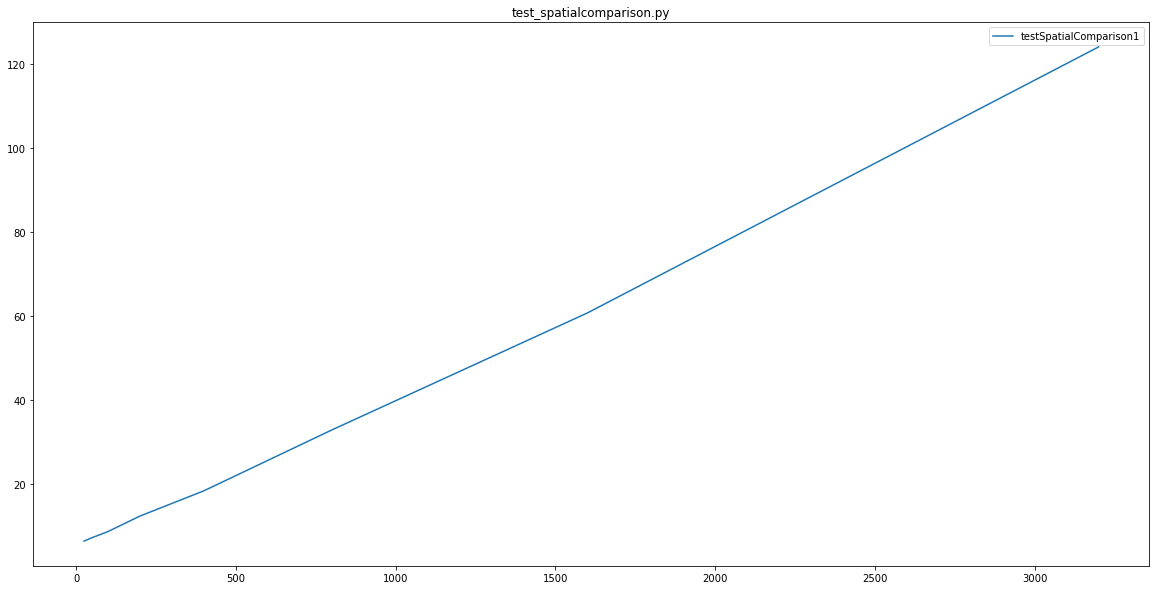

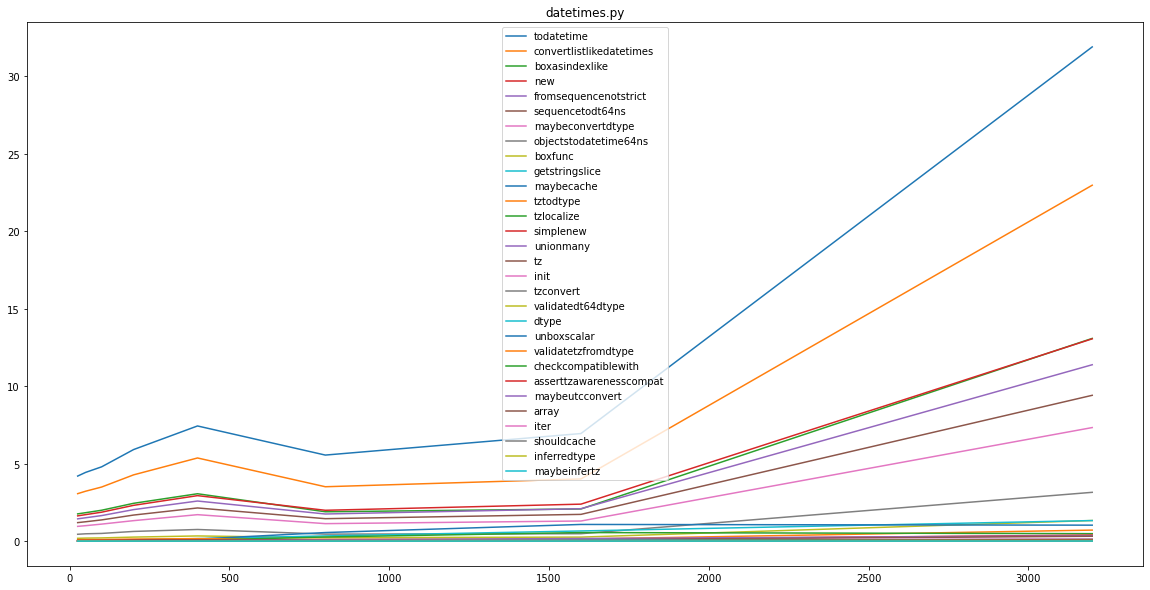

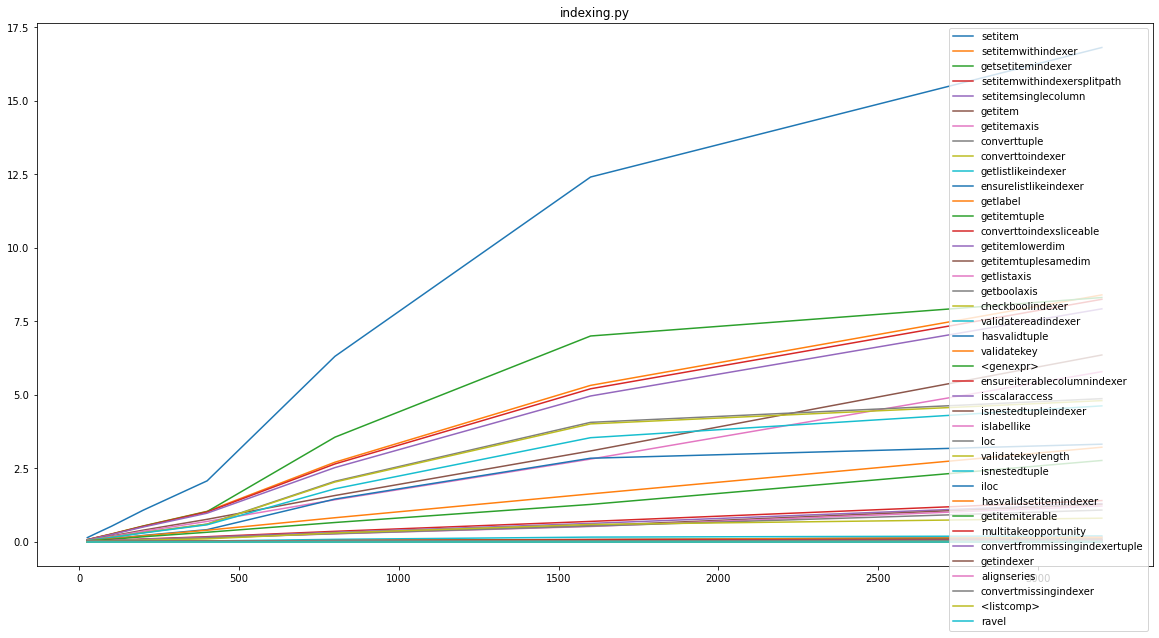

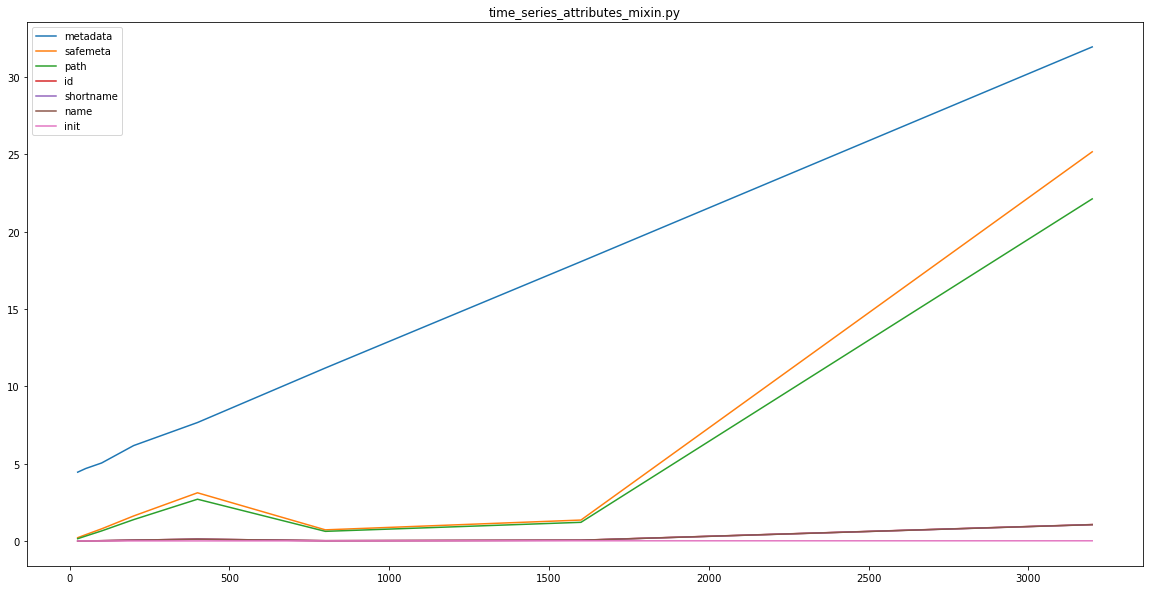

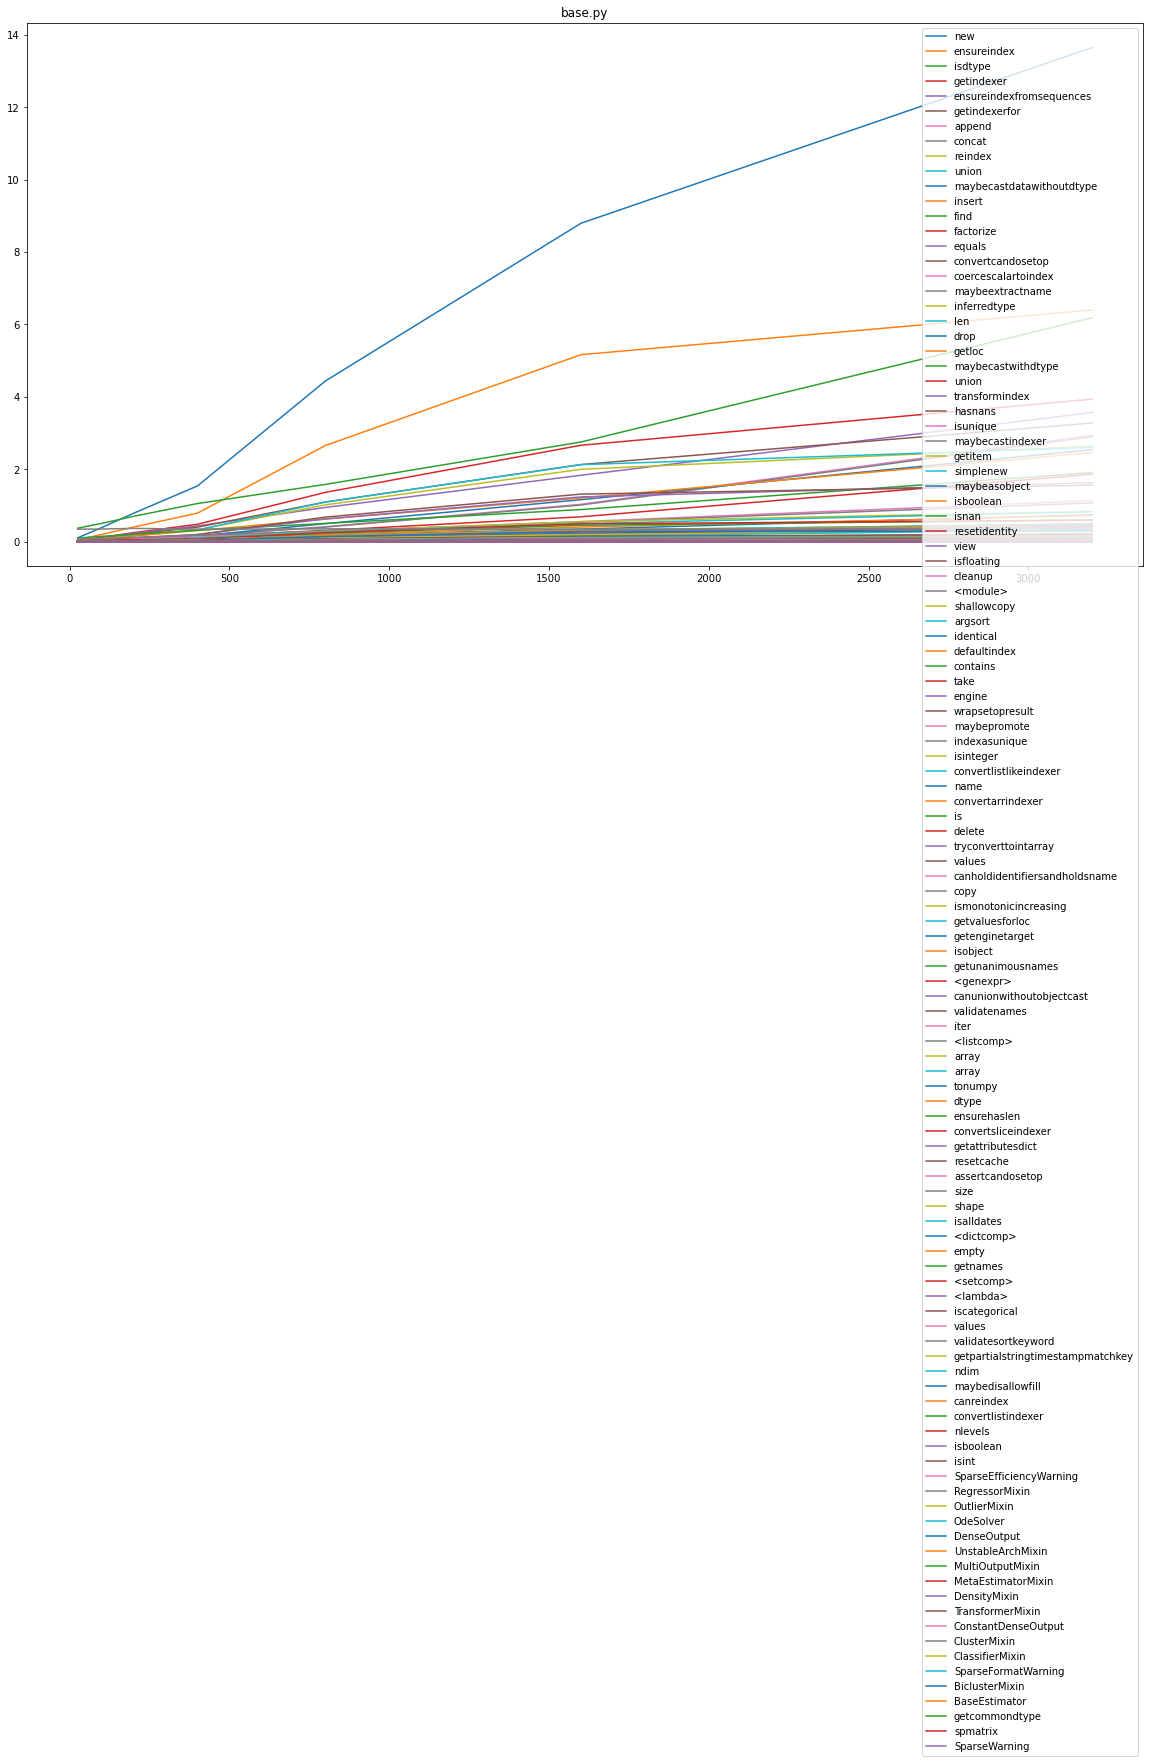

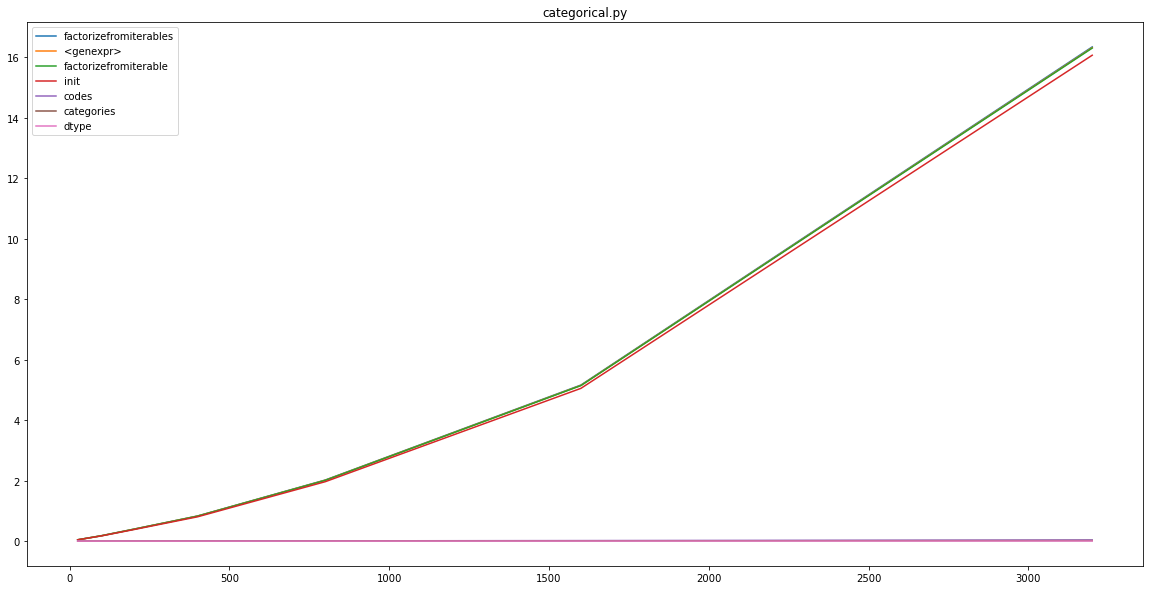

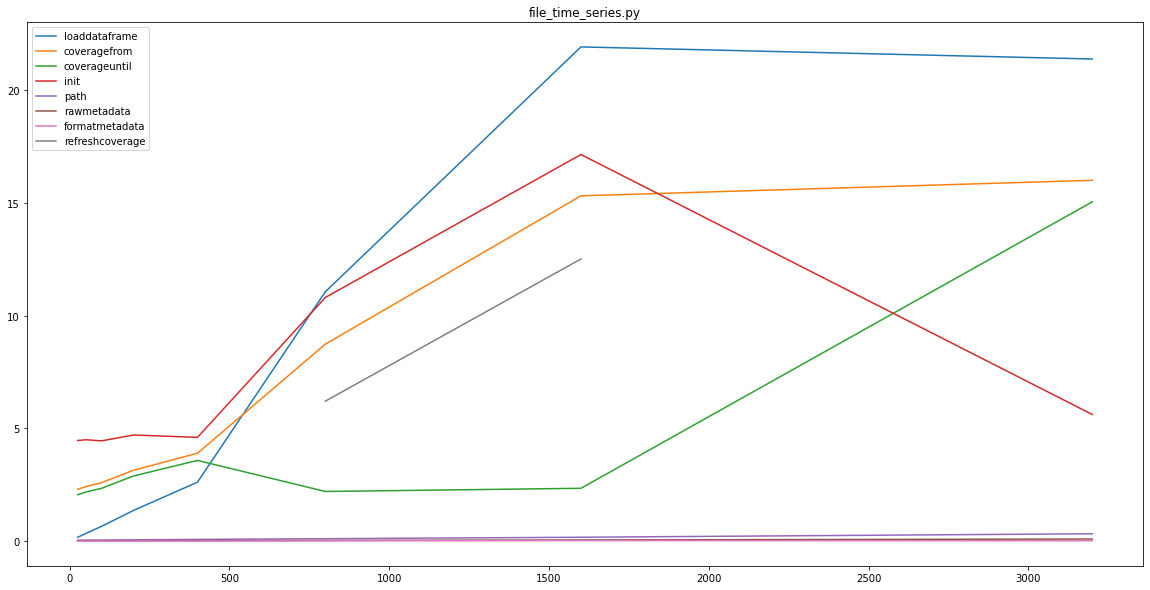

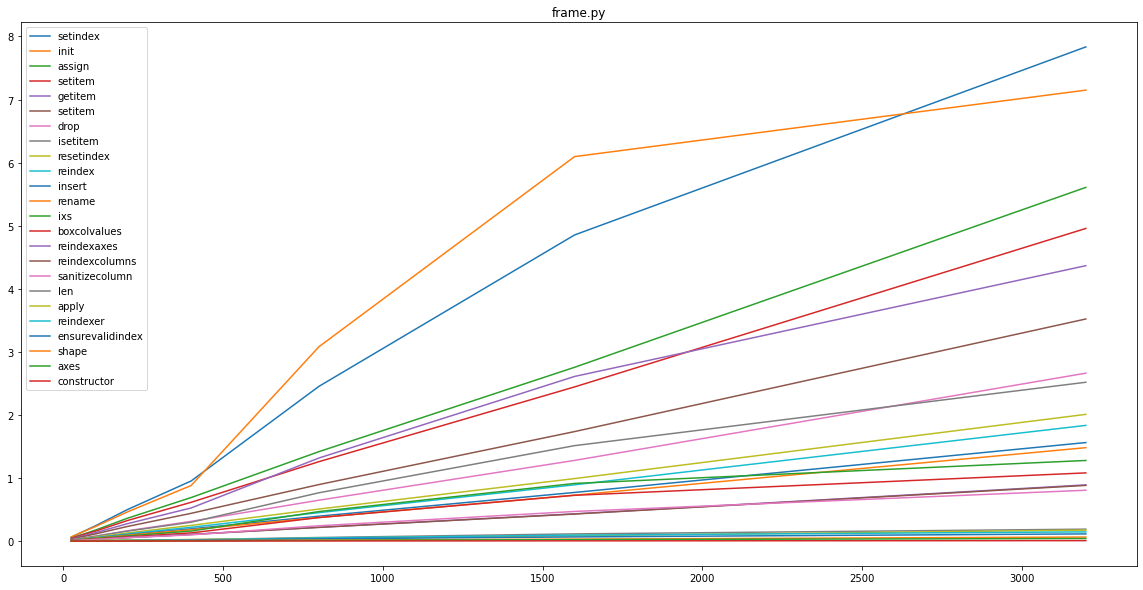

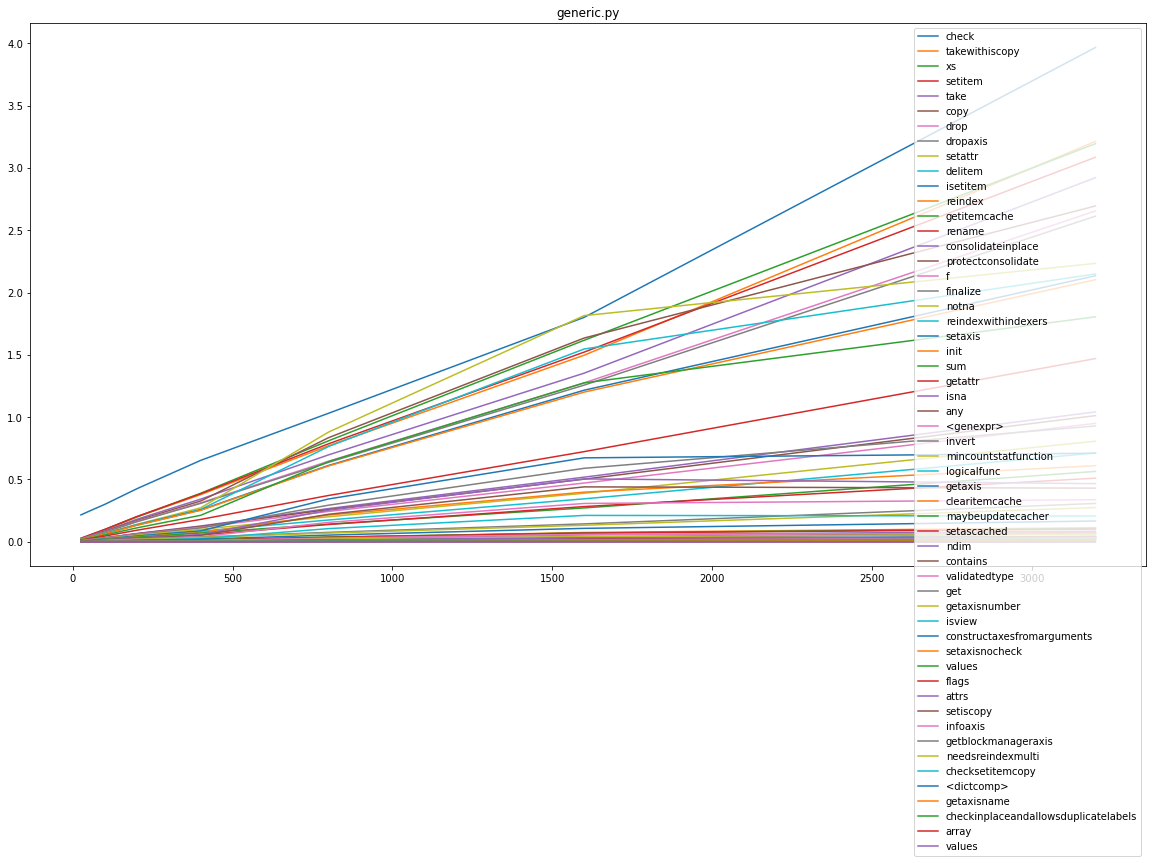

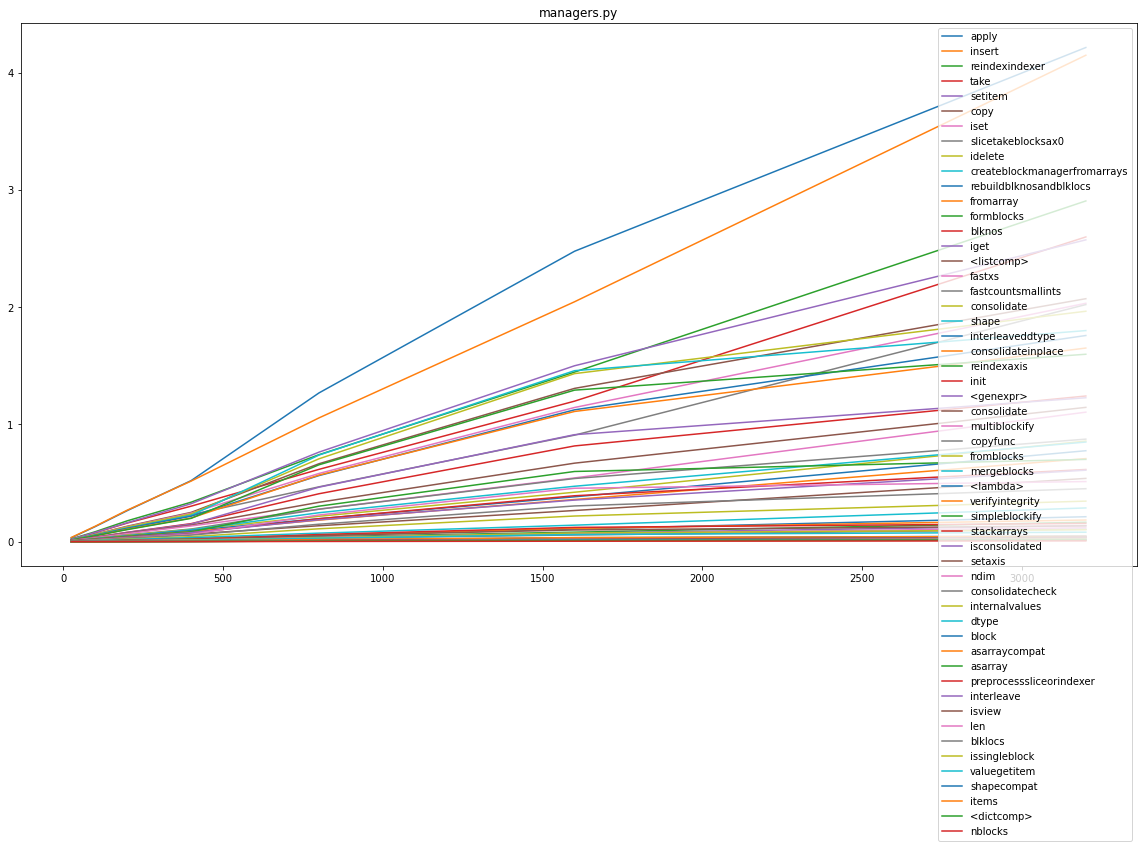

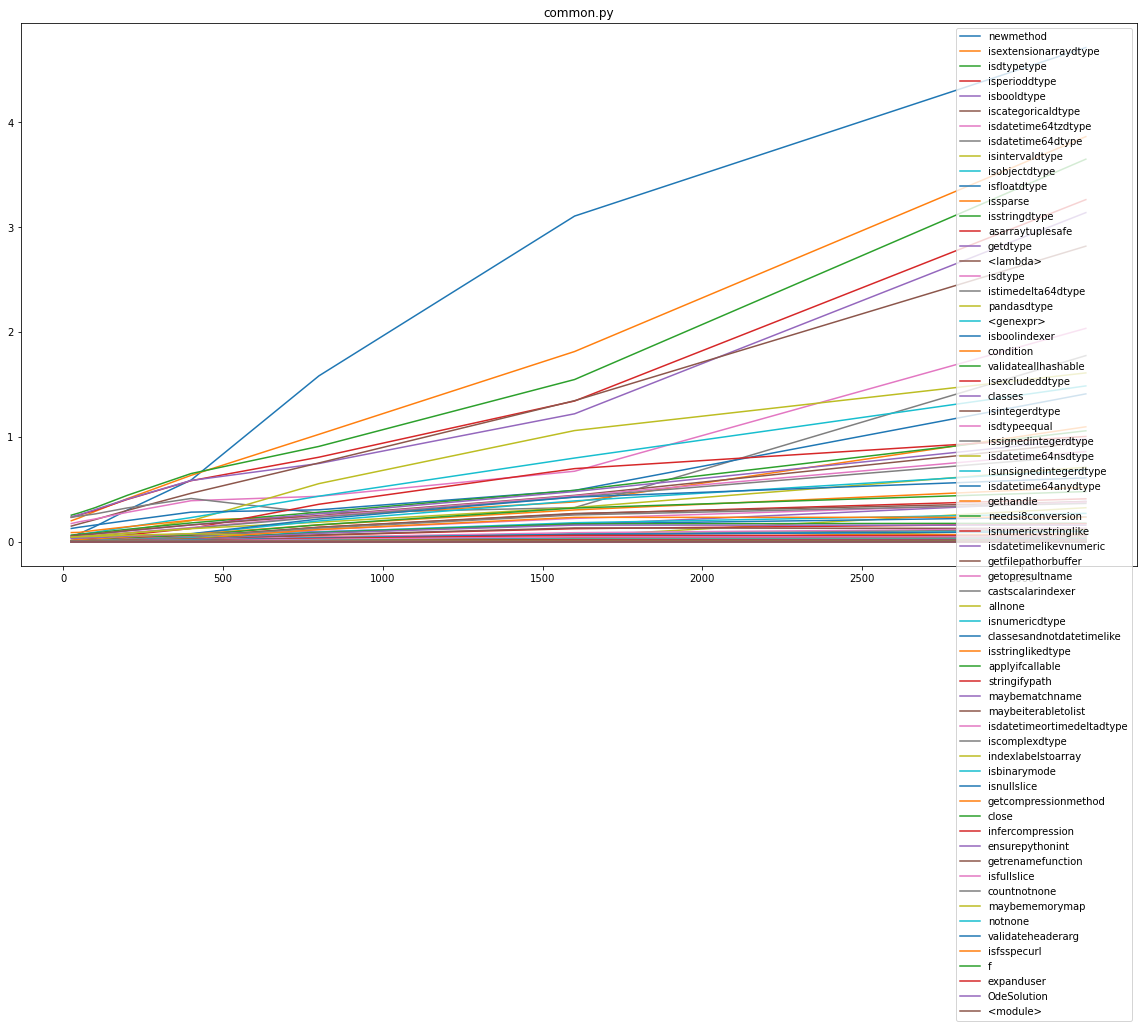

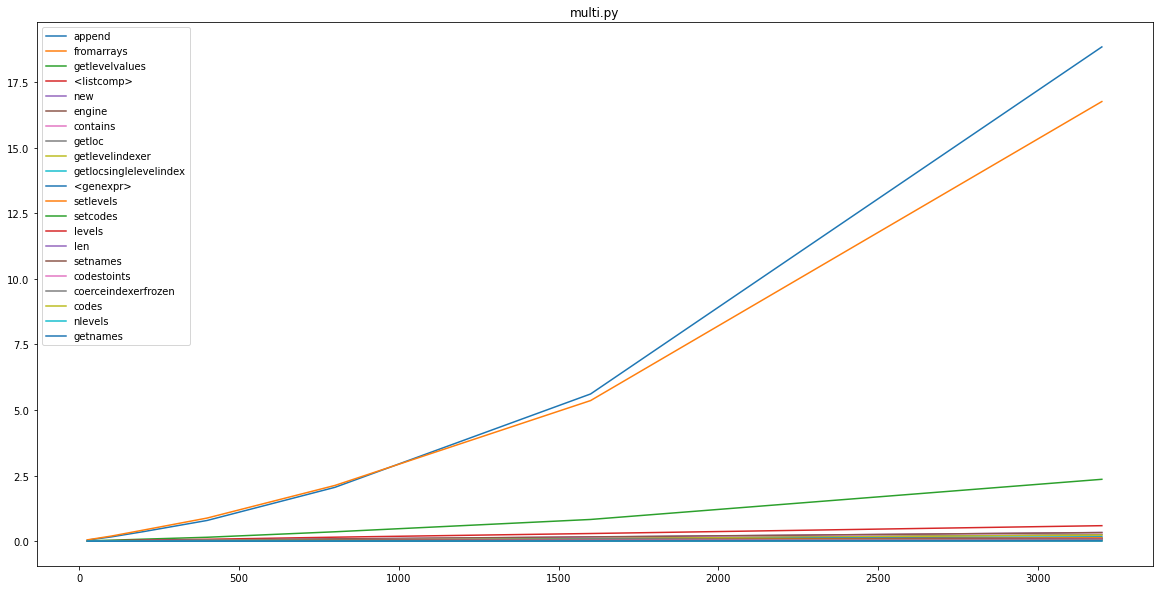

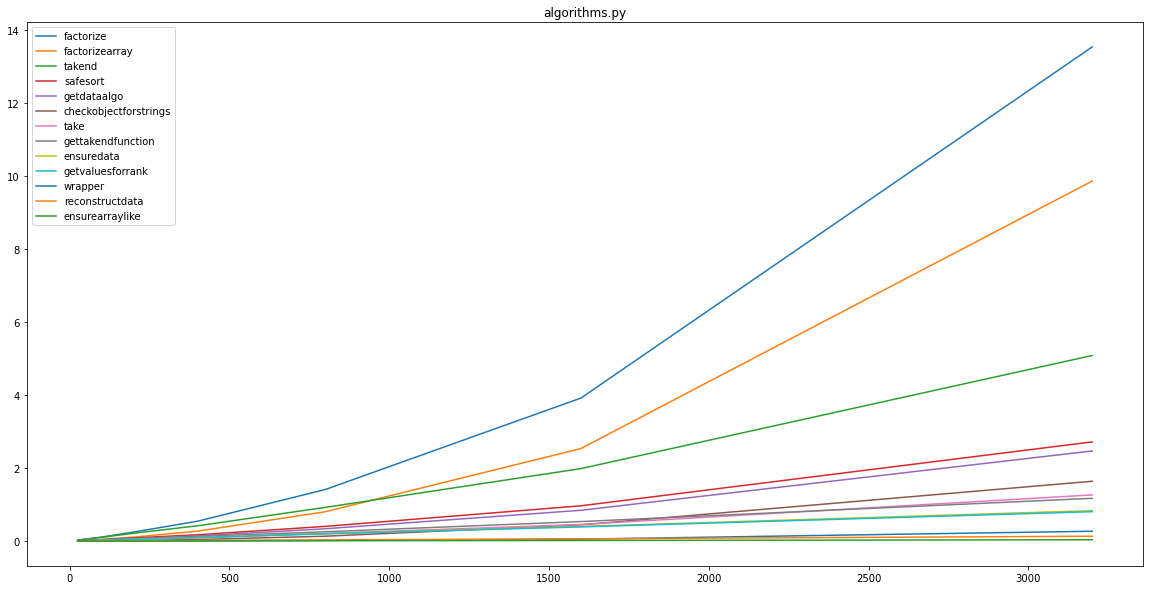

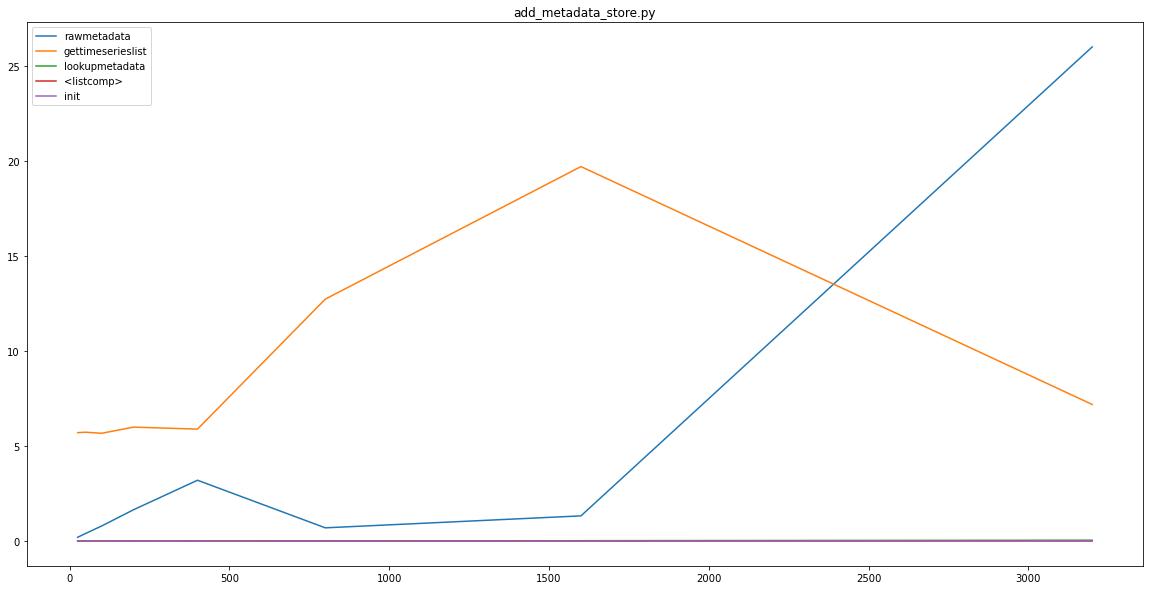

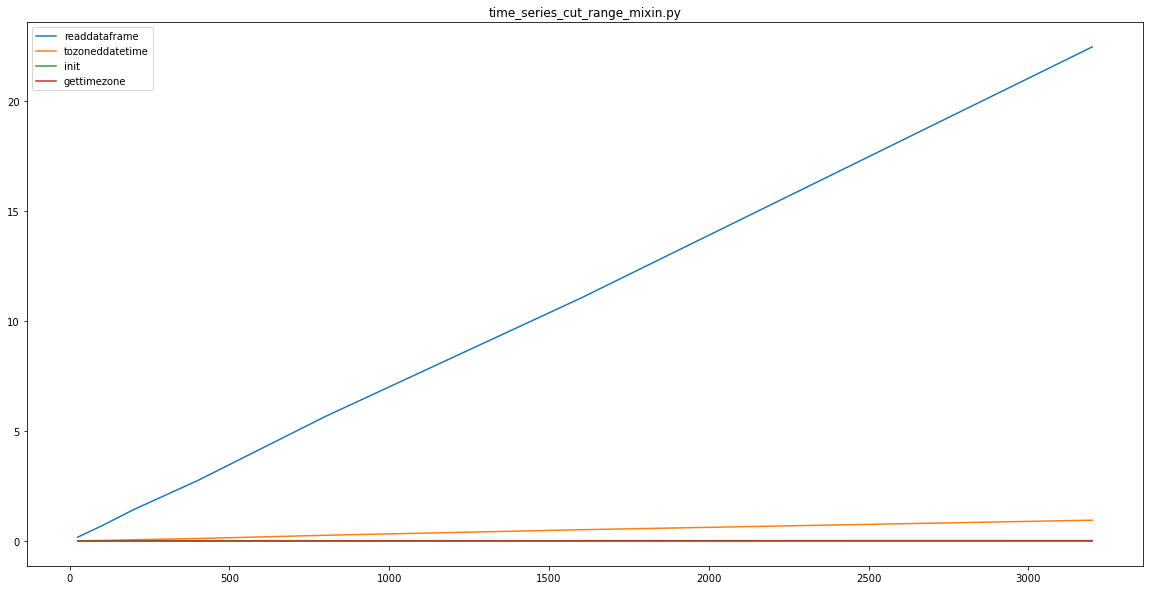

In [369]:
for i, f in enumerate(FINAL) : 
    lgd = [i.replace("_","") for i in f.index]
    f = f.set_index([lgd])
    f=f.sort_values(by=3200, ascending=False)
    f.T.plot(
        figsize=(20,10),
        title=index_list[i],
    )    

In [322]:
df = pd.read_csv(path + filename)
df['file'] = df.iloc[:,-1].apply(lambda x : x.split(':')[0])
df = df[df['file'] == index_list[0]]
df['function'] = df.loc[:,"filename:lineno(function)"].apply(lambda x : x.split("(")[-1][:-1])
    


In [325]:
df.groupby('function').sum()['cumtime']

function
<dictcomp>                 0.000
<listcomp>                 0.055
<setcomp>                  0.000
__init__                   0.011
_filter_neighbors          0.018
_get_ts_list               5.712
_get_ts_list_data          0.567
_get_ts_list_parameters    0.066
check                      0.022
convert_param              0.001
is_corrector               0.000
is_multi_target            0.000
prepare_check_kwargs       1.262
propagate                  0.000
report_incidents           0.000
ts_map                     0.000
use_comments               0.000
use_neighbors              0.000
validate                   6.499
write_comments             0.000
Name: cumtime, dtype: float64

In [313]:
df

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file,function
3,1,0.037,0.037,121.469,121.469,validation_rule.py:275(validate),validation_rule.py,validate
4,3200,0.007,0.000,96.395,0.030,validation_rule.py:708(prepare_check_kwargs),validation_rule.py,prepare_check_kwargs
5,3200,0.052,0.000,96.388,0.030,validation_rule.py:494(prepare_check_kwargs),validation_rule.py,prepare_check_kwargs
6,1,0.059,0.059,88.304,88.304,validation_rule.py:441(_get_ts_list_data),validation_rule.py,_get_ts_list_data
49,2,0.000,0.000,7.196,3.598,validation_rule.py:382(_get_ts_list),validation_rule.py,_get_ts_list
60,1,0.006,0.006,6.295,6.295,validation_rule.py:420(_get_ts_list_parameters),validation_rule.py,_get_ts_list_parameters
62,1,0.002,0.002,6.072,6.072,validation_rule.py:424(<listcomp>),validation_rule.py,<listcomp>
122,3200,0.121,0.000,2.532,0.001,validation_rule.py:223(check),validation_rule.py,check
136,3200,0.023,0.000,2.320,0.001,validation_rule.py:580(_filter_neighbors),validation_rule.py,_filter_neighbors
227,1,0.002,0.002,1.009,1.009,validation_rule.py:327(<listcomp>),validation_rule.py,<listcomp>


In [301]:
df = pd.read_csv(path + filename)
df['file'] = df.iloc[:,-1].apply(lambda x : x.split(':')[0])

In [302]:
df

,ncall,tottime,percall,cumtime,percall.1,filename:lineno(function),file
0,1,0.000,0.000,123.968,123.968,case.py:632(_callTestMethod),case.py
1,1,0.000,0.000,123.968,123.968,test_spatialcomparison.py:47(testSpatialCompar...,test_spatialcomparison.py
2,1,0.001,0.001,123.968,123.968,validation_executor.py:113(validate),validation_executor.py
3,1,0.037,0.037,121.469,121.469,validation_rule.py:275(validate),validation_rule.py
4,3200,0.007,0.000,96.395,0.030,validation_rule.py:708(prepare_check_kwargs),validation_rule.py
...,...,...,...,...,...,...,...
3606,1,0.000,0.000,0.000,0.000,valuesequence.py:27(id),valuesequence.py
3607,1,0.000,0.000,0.000,0.000,{built-in method sys.audit},{built-in method sys.audit}
3608,1,0.000,0.000,0.000,0.000,range.py:27(id),range.py
3609,1,0.000,0.000,0.000,0.000,comparison_null.py:26(id),comparison_null.py


In [300]:
df

,25,50,100,200,400,800,1600,3200
datetimes.py,15.047,15.857,17.265,21.344,27.104,19.578,24.324,118.893
validation_rule.py,14.213,16.979,22.175,34.544,55.664,101.014,193.288,428.067
file_time_series.py,9.039,9.468,10.095,12.169,14.784,39.138,69.452,58.461
validation_executor.py,8.315,9.136,10.599,14.377,20.271,34.760,62.540,125.788
time_series_format.py,6.605,6.605,6.549,6.924,6.797,15.249,23.861,8.318
...,...,...,...,...,...,...,...,...
{function Random.seed at 0x7f1c901f5310},NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
{built-in method __new__ of type object at 0x55b6380b4580},NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.232
{function FrozenList.__getitem__ at 0x7f0926003c10},NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009
{function _typedict.__getitem__ at 0x7f0927bdd820},NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [236]:
RESULT = []
filelist = [25, 50, 100, 200, 400, 800, 1600, 3200]
for d in filelist :     
    filename = 'test_' + str(d) + '_v3.csv'
    df = pd.read_csv(path + filename)
    df['file'] = df.iloc[:,-1].apply(lambda x : x.split(':')[0])
    df_0 = df[df['file'] == idx3[0]]
    df_0['function'] = df_0.iloc[:,-2].apply(lambda x : x.split('(')[1][:-1])
    col = df_0.groupby('function').sum()['cumtime'].sort_values(ascending = False)    
    
    RESULT.append(col)

df_0 = pd.concat(RESULT, axis=1)
df_0.columns = filelist
df_0 = df_0.set_index(
    pd.Series(df_0.index).apply(lambda x : x.replace("_","")
                             )
)

<ipython-input-236-814e5d22a845>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['function'] = df_0.iloc[:,-2].apply(lambda x : x.split('(')[1][:-1])


In [237]:
RESULT = []
filelist = [25, 50, 100, 200, 400, 800, 1600, 3200]
for d in filelist :     
    filename = 'test_' + str(d) + '_v3.csv'
    df = pd.read_csv(path + filename)
    df['file'] = df.iloc[:,-1].apply(lambda x : x.split(':')[0])
    df_1 = df[df['file'] == idx3[1]]
    df_1['function'] = df_1.iloc[:,-2].apply(lambda x : x.split('(')[1][:-1])
    col = df_1.groupby('function').sum()['cumtime'].sort_values(ascending = False)    
    
    RESULT.append(col)

df_1 = pd.concat(RESULT, axis=1)
df_1.columns = filelist
df_1 = df_1.set_index(
    pd.Series(df_1.index).apply(lambda x : x.replace("_","")
                             )
)

<ipython-input-237-15ebd6135d65>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['function'] = df_1.iloc[:,-2].apply(lambda x : x.split('(')[1][:-1])


<AxesSubplot:title={'center':'data_filter.py'}>

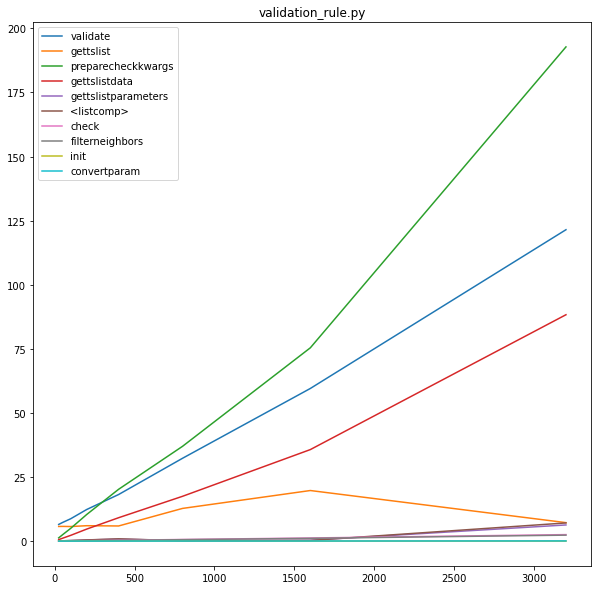

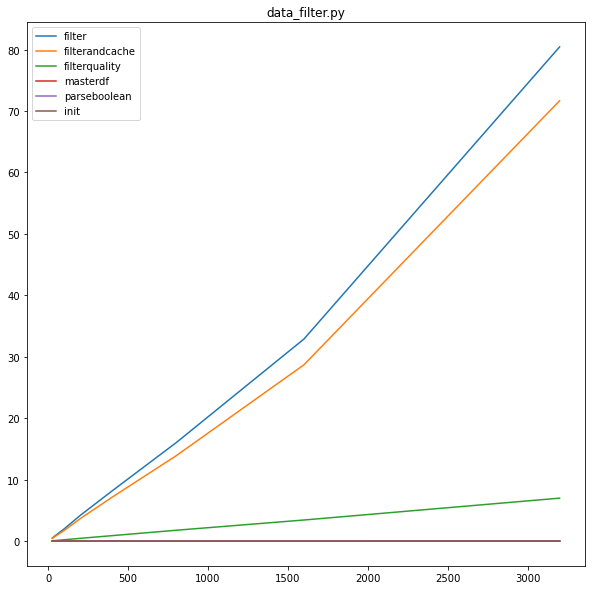

In [242]:
df_0.iloc[:10,:].T.plot(figsize=(10,10), title=idx3[0])
df_1.iloc[:10,:].T.plot(figsize=(10,10), title=idx3[1])